"""
Module `datloader` provides a simple workflow for data preprocessing and exploratory analysis.

`.Data()` loads a CSV file into a custom `Data` object, a subclass of pandas.DataFrame.  
It handles missing values (`impute=True` to fill with median/mode, `False` to drop rows) and automatically transforms column data types.
"""

In [ ]:
import sys
sys.path.append('../src')
import datloader as dl
import importlib
importlib.reload(dl)
df = dl.Data('../data/Customertravel.csv', impute = False)
df.info()


Import successfully; nrow = 954, ncol = 7.
<class 'datloader.Data'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         954 non-null    int64   
 1   FrequentFlyer               954 non-null    category
 2   AnnualIncomeClass           954 non-null    category
 3   ServicesOpted               954 non-null    int64   
 4   AccountSyncedToSocialMedia  954 non-null    category
 5   BookedHotelOrNot            954 non-null    category
 6   Target                      954 non-null    int64   
dtypes: category(4), int64(3)
memory usage: 26.7 KB


"""
Method `.summary()` provides a quick visual summary of each variable using either a histogram or a pie chart. By default, it summarizes the first six columns of the dataset.
"""

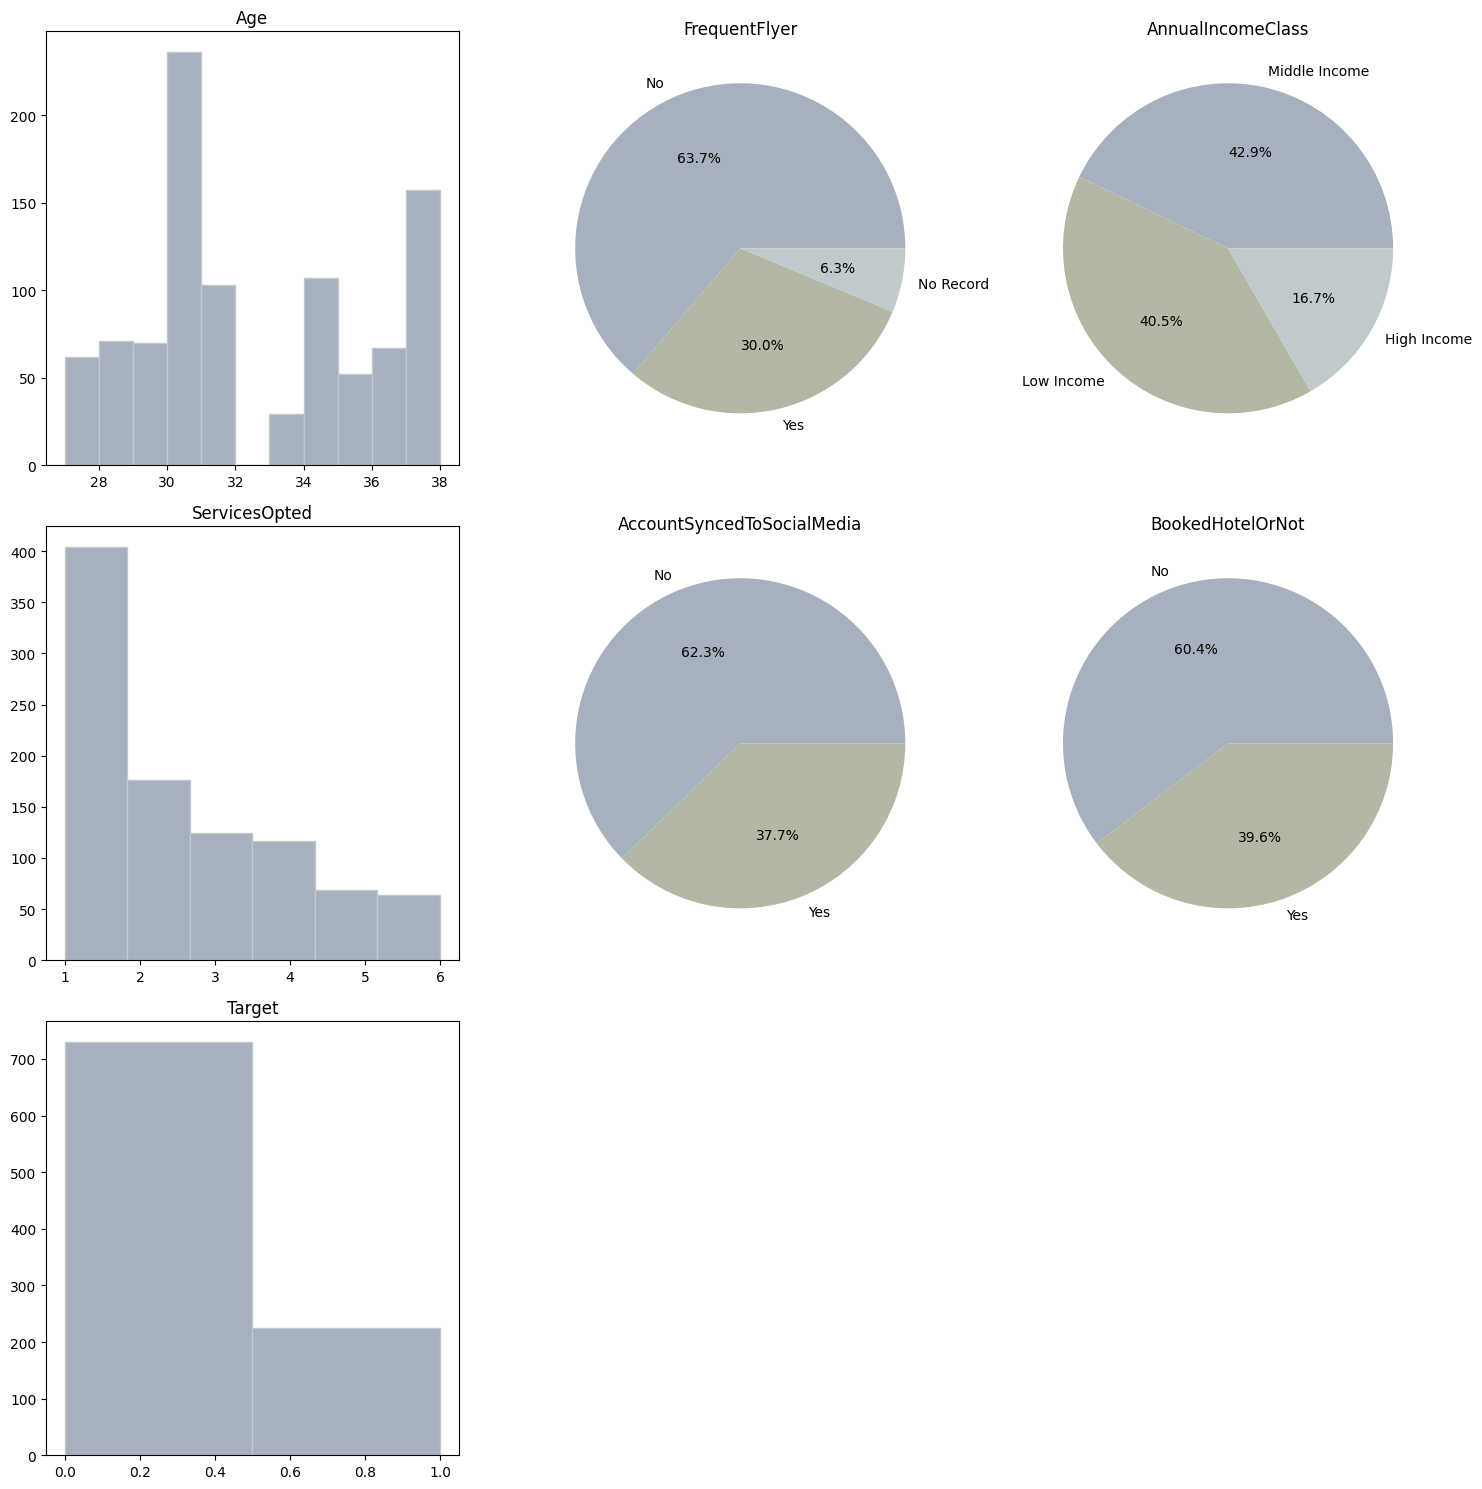

In [344]:
df.summary(col = range(df.shape[1]))

"""
Method `.explain()` fits a statistical model for the specified `response` variable depending on `resp_type`:  
- OLS for `numerical` data  
- Logistic regression for `categorical` data (binary)  
- Poisson or Negative Binomial GLM for `count` data  
"""

In [338]:
mod1 = df.explain(response = "Target", resp_type = "categorical")


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  954
Model:                            GLM   Df Residuals:                      945
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -381.47
Date:                Thu, 21 Aug 2025   Deviance:                       762.95
Time:                        10:50:00   Pearson chi2:                     915.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2520
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

"""
Method `.diagnose()` provides four classic diagnostic plots for model evaluation in one call.  
Alternatively, the same plots can be generated individually using:  
- `.resid_vs_fit()` – residuals vs fitted values  
- `.qqplot()` – normal Q–Q plot of residuals  
- `.scale_location()` – scale–location plot  
- `.resid_vs_leverage()` – residuals vs leverage plot
"""

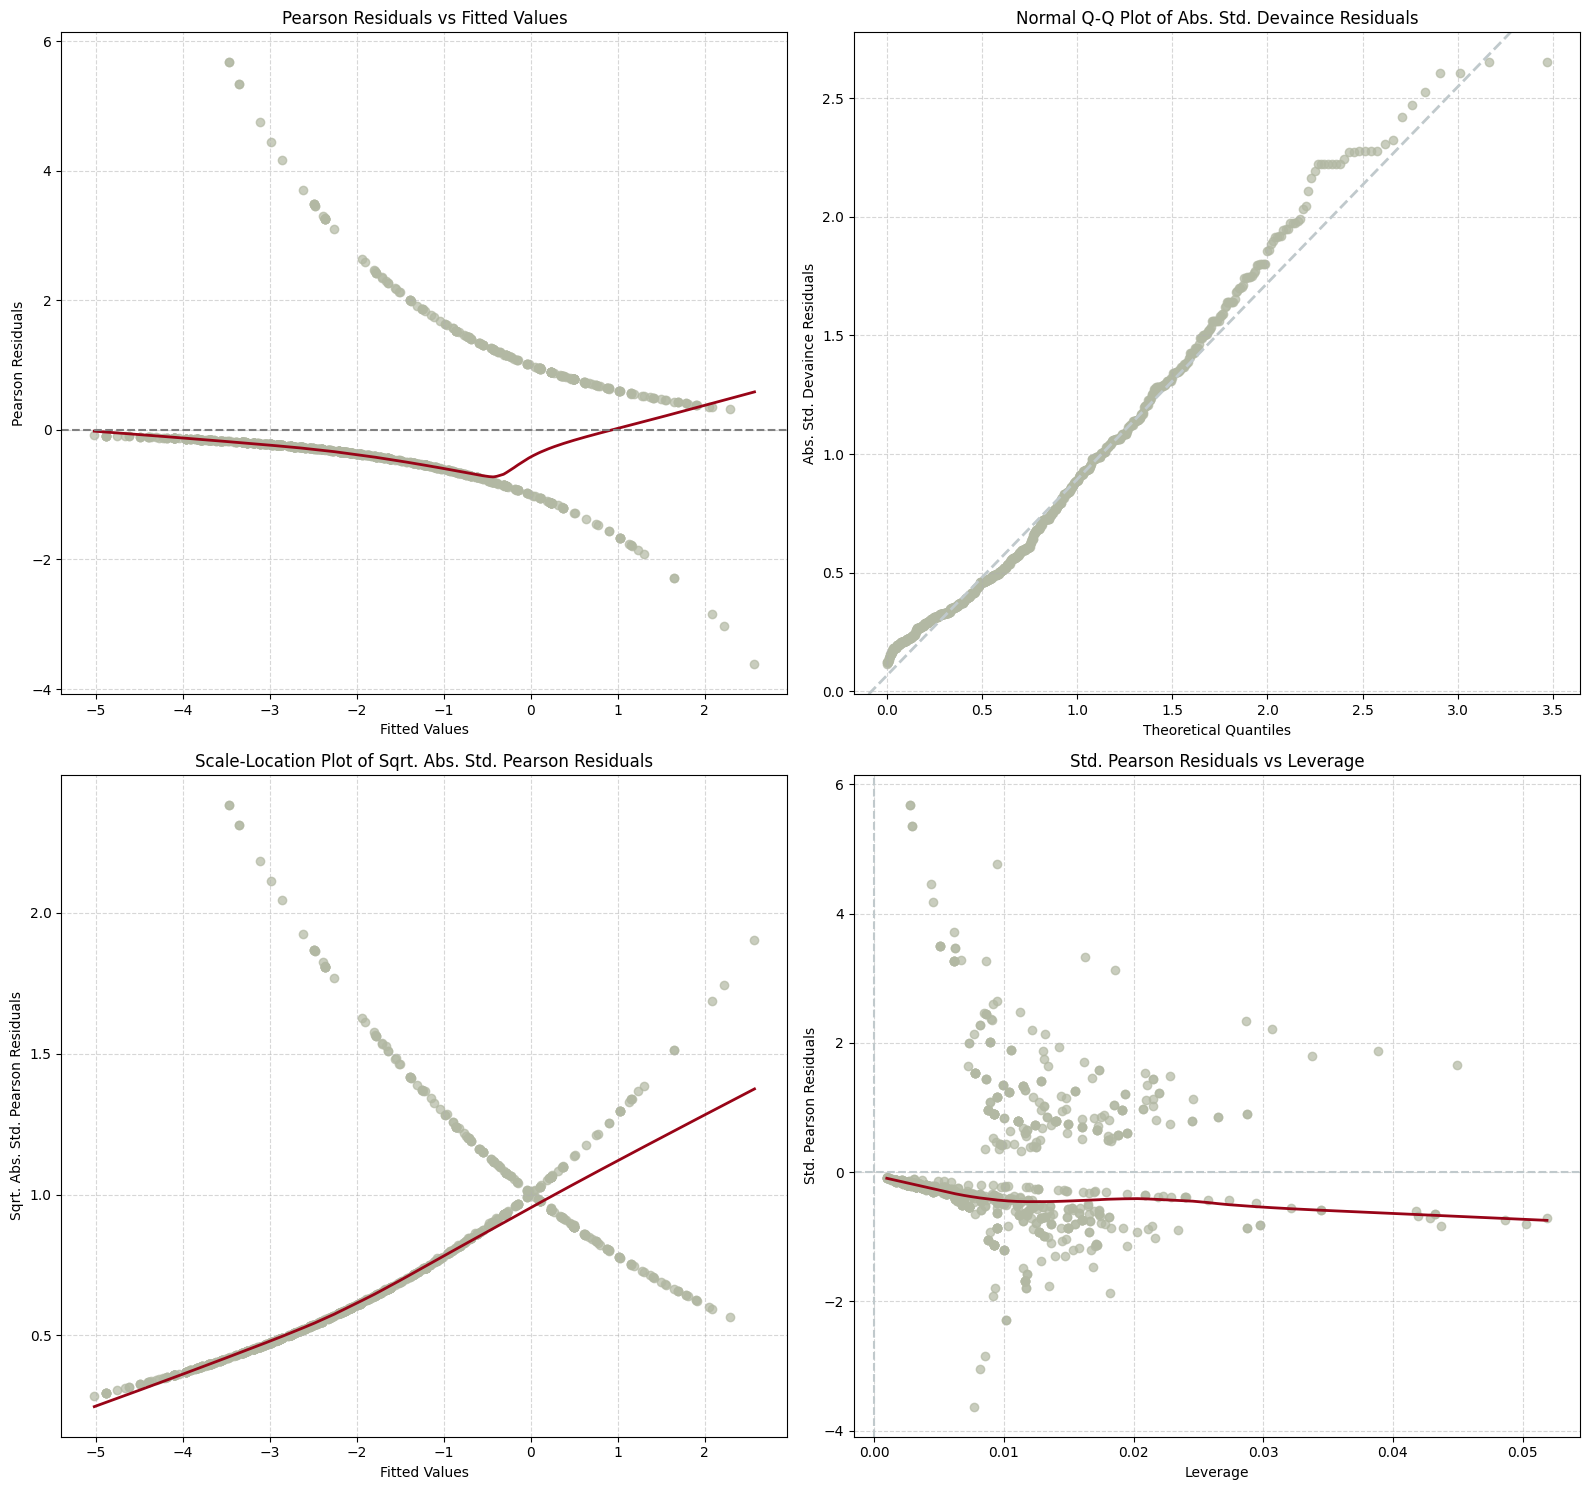

In [339]:
mod1.diagnose()

"""
Method `.out()` export model results and effect measures: coefficients for OLS, odds ratios for Logit, rate ratios for Poisson/NB with their 95% CI.
"""

In [341]:
mod1.out()

                                    Coef.  Std.Err.         z         P>|z|  \
const                            2.121587  0.929311  2.282968  2.243227e-02   
Age                             -0.131108  0.029280 -4.477725  7.544274e-06   
ServicesOpted                    0.353555  0.061243  5.772985  7.787918e-09   
FrequentFlyer_No Record          0.106319  0.421227  0.252404  8.007292e-01   
FrequentFlyer_Yes                1.692505  0.275131  6.151639  7.668643e-10   
AnnualIncomeClass_Low Income    -0.542475  0.268106 -2.023360  4.303604e-02   
AnnualIncomeClass_Middle Income -1.654118  0.377906 -4.377064  1.202884e-05   
AccountSyncedToSocialMedia_Yes   0.790724  0.200213  3.949407  7.834493e-05   
BookedHotelOrNot_Yes            -0.855717  0.218352 -3.918970  8.892800e-05   

                                 Odds Ratio  CI Lower   CI Upper  
const                              8.344373  1.350090  51.573288  
Age                                0.877123  0.828204   0.928932  
Services